# 1 - Perkenalan
  > Bab pengenalan harus diisi dengan identitas, **query yang telah kalian buat pada Google Cloud Platform!**, dan _objective_ yang ingin dicapai.

## 1.1 - Identity

Name : Jason Rich Darmawan Onggo Putra

Batch : 016 Remote

## 1.2 - SQL Query on BigQuery

[SQL Query on BigQuery](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=census_adult_income&page=table)

```
SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket
FROM `bigquery-public-data.ml_datasets.census_adult_income` 
WHERE workclass != ' ?'
 AND hours_per_week < 100
LIMIT 31984;
```

## 1.3 - Objective

> Buatlah model Classification menggunakan Logistic Regression dan SVM untuk memprediksi income bracket menggunakan dataset yang sudah kalian simpan.

The objective is to predict the column `income bracket` using the [dataset](./h8dsft_P1G2_jason_rich_darmawan_onggo_putra.csv) using 2 supervised learning methods:
1. Logistic Regression
2. Support Vector Machines

The model should have acceptable accuracy score and recall score income bracket ` >50K`.

## 1.4 - Conceptual Problems

1. Apakah yang dimaksud dengan coeficient pada logistic regression?

   Logistic Regression y-axis is `log(probability of target / (1 - probability of target)`.

   For example, in predicting if a mouse is obese, we have an equation of `y = -3.48 + 1.83 * weight`

   If the mouse weight is 50, then the y is 88.02.

   88.02 = log(probability of target / 1 - probability of target)

   I am not a mathematician (I do not know how to break up the log(a/1-a) to search the a value), so let's say the probability of target is 99.99%

   log(0.99/0.01) is 1.99. And, 88.02 is larger than 1.99

   Therefore, a mouse with weight of 50, should probability of being obese more than 99.99% (the probability is infinite).

   Now that we understand that, coefficient regression is the Linear Regression equation, `y = -3.48 + 1.83 * weight` which translates to `p = (e^y / (1 + e^y)` in the Logistic Regression equation.
   
   The `-3.48` is the intercept, which means if the mouse weight is 0. The y will be -3.48 which means the probability of obese is 0.00% (infinite). 
   
   The slope of weight is `1.83`, just like in Linear Regression, the higher the slope is, the more the line is pulled to the left (until it looks like a vertical line). In the Logistic Regression, the higher the slope, the higher probability of a mouse being obese because of its weight.

   [see](https://www.desmos.com/calculator/4ttqn6i7lm)

2. Apakah yang dimaksud dengan Support Vector pada SVM?

   Vector is one dimension. Support Vector means, if you have two features like feature 'age' and feature 'hours_per_week' [outline](#425---linear-or-nonlinear), you have no idea how to separate the class, right? 
   
   Support Vector comes to the rescue! 
   
   It makes 2D (X-axis with feature 'age', y-axis with feature 'hours_per_week') into 3D world (support vector or z-axis with `age^2 + hours_per_week^2`).

   ![support vector](./images/Screen%20Shot%202022-11-11%20at%2023.21.42.png)

   Now, you can draw a line to separate the income_bracket.

3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

   I assume kernel parameter in question is kernel parameter of `sklearn.svm.SVC`.

   The kernel that I understand is `kernel='linear'`. The visualization is as follow:

   ![kernel=linear](./images/Screen%20Shot%202022-11-11%20at%2023.21.42.png)

   If you change it to `kernel='poly'`, the line will not be a straight line but a sguiggly line. The visualization is as follow:

   ![kernel=poly](./images/The-effect-of-the-degree-of-a-polynomial-kernel-The-polynomial-kernel-of-degree-1-leads.png)

   This is the visualization similar to the previous line. Sguiggly line, right?

   ![kernel=linear](./images/image-1.png)

# 2 - Import Libraries
  > _Cell_ pertama pada _notebook_ **harus berisi dan hanya berisi** semua _library_ yang digunakan dalam _project_.

In [1]:
# Data Loading
import pandas as pd
from pandas.api.types import CategoricalDtype

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
# Feature Selection (manual)
import numpy as np
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2, SelectKBest

# Feature Engineering
from sklearn.pipeline import Pipeline

# Feature Selection v2
from sklearn.feature_selection import SelectFromModel

# Model Definition
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

# Model Inference
import joblib

# 3 - Data Loading
  > Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
data = pd.read_csv("./h8dsft_P1G2_jason_rich_darmawan_onggo_putra.csv")
# data.head() and data.tail()
data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,18,Never-worked,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K
1,37,Private,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,0,33,?,<=50K
2,39,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Wife,Black,Female,0,0,54,Dominican-Republic,>50K
3,29,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,18,United-States,<=50K
4,64,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,21,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30720,50,Self-emp-inc,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,70,Germany,<=50K
30721,21,Private,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,70,United-States,<=50K
30722,32,Private,Some-college,10,Separated,Machine-op-inspct,Unmarried,Black,Female,0,0,70,United-States,<=50K
30723,39,Private,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,Black,Female,0,0,70,United-States,<=50K


## 3.1 - Columns unique values

- numerical columns:
  - 'age', 'capital_gain', 'capital_loss', 'hours_per_week'
- categorical columns:
  - nominal: 'workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'
  - ordinal: 'education', 'education_num', 'income_braket'

- do not use both columns 'education' or 'education_num' [done](#53---feature-selection)
- [x] determine if this a imbalanced dataset. [outline](#41---determine-if-dataset-is-imbalanced)

In [3]:
# column 'workclass' values have space before the word.
data['workclass'].unique()

array([' Never-worked', ' Private', ' Self-emp-not-inc', ' Self-emp-inc',
       ' State-gov', ' Federal-gov', ' Local-gov', ' Without-pay'],
      dtype=object)

In [4]:
# column 'education' and 'education_num' are duplicates
data[['education', 'education_num']].value_counts() \
                                    .reset_index() \
                                    .sort_values('education_num')

,education,education_num,0
15,Preschool,1,46
14,1st-4th,2,156
13,5th-6th,3,303
8,7th-8th,4,574
10,9th,5,463
7,10th,6,833
5,11th,7,1057
12,12th,8,393
0,HS-grad,9,9969
1,Some-college,10,6777


In [5]:
# column 'marital_status' values have space before the word
data['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced', ' Separated',
       ' Married-spouse-absent', ' Widowed', ' Married-AF-spouse'],
      dtype=object)

In [6]:
# have space before the word
data['occupation'].unique()

array([' ?', ' Sales', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Tech-support', ' Other-service', ' Prof-specialty',
       ' Exec-managerial', ' Farming-fishing', ' Priv-house-serv',
       ' Protective-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Machine-op-inspct'], dtype=object)

In [7]:
data['relationship'].unique()

array([' Own-child', ' Wife', ' Husband', ' Unmarried', ' Not-in-family',
       ' Other-relative'], dtype=object)

In [8]:
# not sure why is someone with age 90 still considered as ' Own-child' 
# instead of ' Unmarried'.
data.loc[data['relationship'] == ' Own-child', 'age'].agg(['min', 'max'])

min    17
max    90
Name: age, dtype: int64

In [9]:
# column 'race' have ' Other' values
data['race'].unique()

array([' White', ' Asian-Pac-Islander', ' Black', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [10]:
# have space before word
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [11]:
# have space before word
data['native_country'].unique()

array([' United-States', ' ?', ' Dominican-Republic', ' Canada', ' South',
       ' Cuba', ' Mexico', ' Vietnam', ' Philippines', ' India', ' Italy',
       ' Jamaica', ' El-Salvador', ' Trinadad&Tobago', ' Guatemala',
       ' England', ' Germany', ' Puerto-Rico', ' Peru', ' Yugoslavia',
       ' Poland', ' Iran', ' Taiwan', ' Hong', ' Japan', ' Thailand',
       ' Haiti', ' China', ' Ecuador', ' Columbia', ' Greece', ' France',
       ' Hungary', ' Laos', ' Outlying-US(Guam-USVI-etc)', ' Portugal',
       ' Nicaragua', ' Honduras', ' Scotland', ' Ireland', ' Cambodia',
       ' Holand-Netherlands'], dtype=object)

In [12]:
# have space before word
# probably imbalanced dataset
data['income_bracket'].value_counts()

 <=50K    23075
 >50K      7650
Name: income_bracket, dtype: int64

## 3.2 - Info

- [x] change column dtype to 'object' for columns 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income_bracket' [done](#32---describe)

duly noted:
- dtype 'object' is for nominal
- dtype 'category' is for ordinal

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30725 entries, 0 to 30724
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30725 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       30725 non-null  object
 3   education_num   30725 non-null  int64 
 4   marital_status  30725 non-null  object
 5   occupation      30725 non-null  object
 6   relationship    30725 non-null  object
 7   race            30725 non-null  object
 8   sex             30725 non-null  object
 9   capital_gain    30725 non-null  int64 
 10  capital_loss    30725 non-null  int64 
 11  hours_per_week  30725 non-null  int64 
 12  native_country  30725 non-null  object
 13  income_bracket  30725 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.3+ MB


In [14]:
data['income_bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
data[['workclass', 'marital_status', 'occupation', 
      'relationship', 'race', 'sex', 'native_country']] = \
data[['workclass', 'marital_status', 'occupation', 
      'relationship', 'race', 'sex', 'native_country']].astype('object')

education_dtype = CategoricalDtype(categories=[' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', 
                                               ' HS-grad', ' Some-college', ' Assoc-voc', ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school', ' Doctorate'], 
                                   ordered=True)
data['education'] = data['education'].astype(education_dtype)

data['education_num'] = data['education_num'].astype('category')

income_bracket_dtype = CategoricalDtype(categories=[' <=50K', ' >50K'], ordered=True)
data['income_bracket'] = data['income_bracket'].astype(income_bracket_dtype)

del education_dtype, income_bracket_dtype

## 3.3 - Describe

- column 'age' have natural outliers.
- column 'capital_gain' and 'capital_loss' is highly skewed to the right.
- column 'hours_per_week' have natural outliers.

estimated columns after One-Hot Encoding with hyperparameter `drop='first'` are 78 columns:
- column 'workclass' = 7
- column 'marital_status' = 6
- column 'occupation' = 14
- column 'relationship' = 5
- column 'race' = 4
- column 'sex' = 1
- column 'native_country' = 41

In [16]:
data.describe(include='number')

,age,capital_gain,capital_loss,hours_per_week
count,30725.000000,30725.000000,30725.000000,30725.000000
mean,38.439512,1105.785094,88.889959,40.946461
std,13.119665,7497.027762,405.613208,11.987385
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [17]:
# only column education is ordinal.
data.describe(include=['object','category'])

,workclass,education,education_num,marital_status,occupation,relationship,race,sex,native_country,income_bracket
count,30725,30725,30725,30725,30725,30725,30725,30725,30725,30725
unique,8,16,16,7,15,6,5,2,42,2
top,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,9969,9969,14340,4140,12704,26306,20793,27511,23075


# 4 - Exploratory Data Analysis (EDA)
  > Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## 4.1 - Determine if Dataset is Imbalanced

We determine the dataset as imbalanced due to high variations of rows with column 'income_brakcet' values ' >50K'

Therefore, do not do under sampling to avoid losing information.

In [18]:
# dataset is moderately imbalanced
# reference https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data
data['income_bracket'].value_counts()

 <=50K    23075
 >50K      7650
Name: income_bracket, dtype: int64

In [19]:
# calculate rows with column 'income_bracket' values ' >50K'
len(data[data['income_bracket'] == ' >50K'])

7650

In [20]:
# there are 7021 variations.
data.loc[data['income_bracket'] == ' >50K'] \
    .value_counts()

age  workclass  education     education_num  marital_status       occupation        relationship    race    sex      capital_gain  capital_loss  hours_per_week  native_country  income_bracket
47    Private    HS-grad      9               Married-civ-spouse   Craft-repair      Husband         White   Male    0             0             40               United-States   >50K             9
44    Private    Bachelors    13              Married-civ-spouse   Exec-managerial   Husband         White   Male    0             0             40               United-States   >50K             9
43    Private    HS-grad      9               Married-civ-spouse   Craft-repair      Husband         White   Male    0             0             40               United-States   >50K             9
50    Private    HS-grad      9               Married-civ-spouse   Craft-repair      Husband         White   Male    0             0             40               United-States   >50K             8
53    Private    HS-

## 4.2 - X Numerical to y Categorical Relationship


### 4.2.1 - bar plot

we can see pattern between column Features and target.

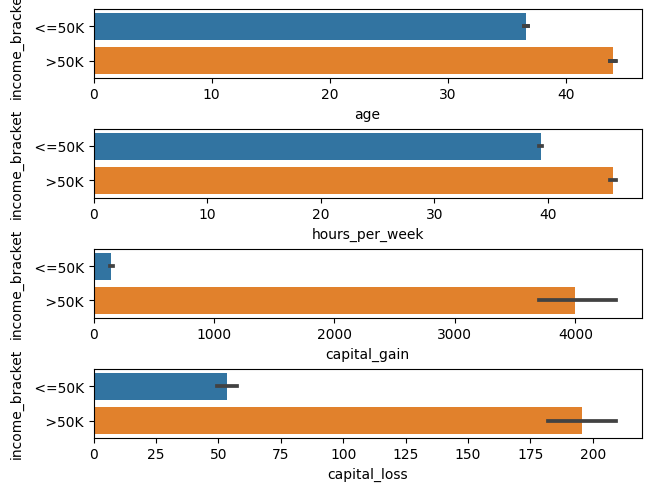

In [21]:
fig, axes = plt.subplots(nrows=4,ncols=1, constrained_layout=True)
sns.barplot(data=data, x="age", y="income_bracket", ax=axes[0])

for index, column in enumerate(['age', 'hours_per_week', 'capital_gain', 'capital_loss']):
    sns.barplot(data=data, x=column, y="income_bracket", ax=axes[index])

del fig, axes, index, column

### 4.2.2 - kde

we can't differentiate 'income_bracket' with 'hours_per_week'.

- [x] drop 'hours_per_week'
  - verdict: by dropping column 'hours_per_week', the model recall score income_bracket ' >50K' drop by 0.01.

we can differentiate 'income_braket' with 'age', 'capital_gain', 'capital_loss'.

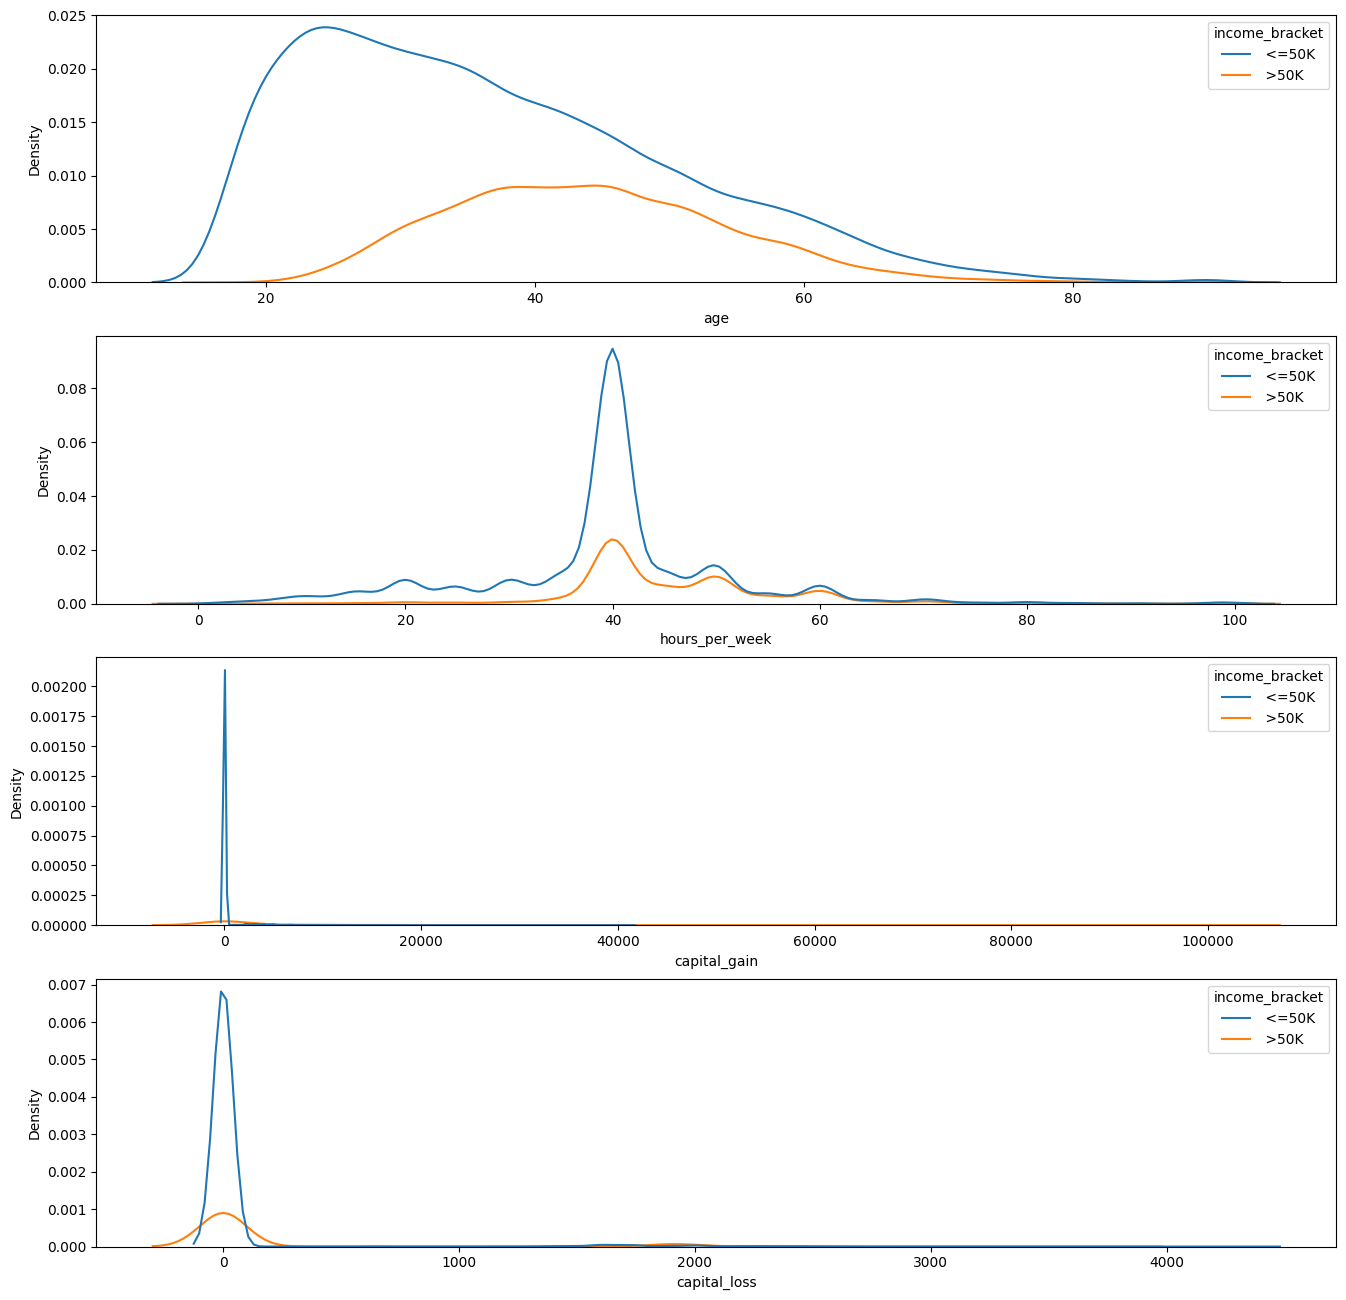

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16,16))

for column, ax in zip(['age', 'hours_per_week', 'capital_gain', 'capital_loss'], axes.ravel()):
    sns.kdeplot(data=data, x=column, hue='income_bracket', ax=ax)

del fig, axes, column, ax

### 4.2.3 - min max

In [23]:
# age <19 is definitely income_bracket ' <=50K'

# capital_gain >41310 is definitely income_bracket ' >50K'

# capital_loss >3683 is definitely income_bracket ' <=50K'
data.groupby('income_bracket')[['age', 'hours_per_week', 'capital_gain', 'capital_loss']] \
    .agg((['min','max']))

age     hours_per_week     capital_gain        capital_loss  \
               min max            min max          min    max          min   
income_bracket                                                               
 <=50K          17  90              1  99            0  41310            0   
 >50K           19  90              1  99            0  99999            0   

                      
                 max  
income_bracket        
 <=50K          4356  
 >50K           3683

### 4.2.4 - distribution

column 'age'' is moderately skewed to the right. It has natural outliers.

column 'hours_per_week', is fairly symmetrical. It has natural outliers.

column 'capital_gain' and 'capital_loss' is highly skewed to the right.

- [x] do median imputation. [done](#53---feature-selection)

In [24]:
data[['age', 'hours_per_week', 'capital_gain', 'capital_loss']].skew()

age                0.531668
hours_per_week     0.330749
capital_gain      11.787237
capital_loss       4.514917
dtype: float64

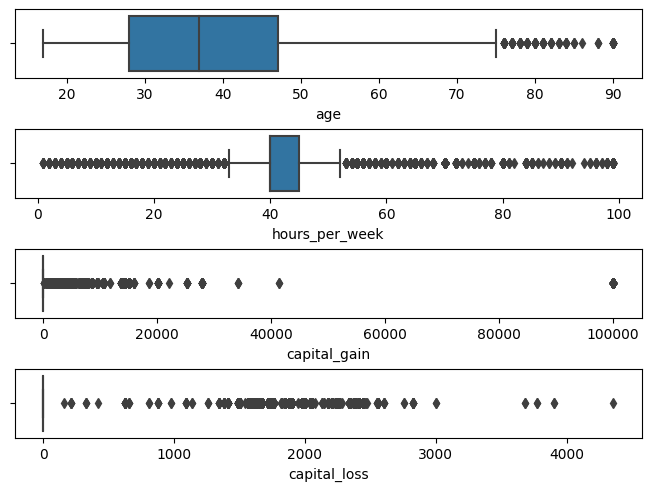

In [25]:
fig, axes = plt.subplots(nrows=4, ncols=1, constrained_layout=True)
for column, ax in zip(['age', 'hours_per_week', 'capital_gain', 'capital_loss'], axes.ravel()):
    sns.boxplot(data=data, x=column, ax=ax)

del fig, axes, column, ax

### 4.2.5 - linear or nonlinear

horror :) definitely not linear. If we want to use feature 'age' to maximize the model ability to predict income_bracket ' >50K', we can't use `sklearn.linear_model.LogisticRegression`.

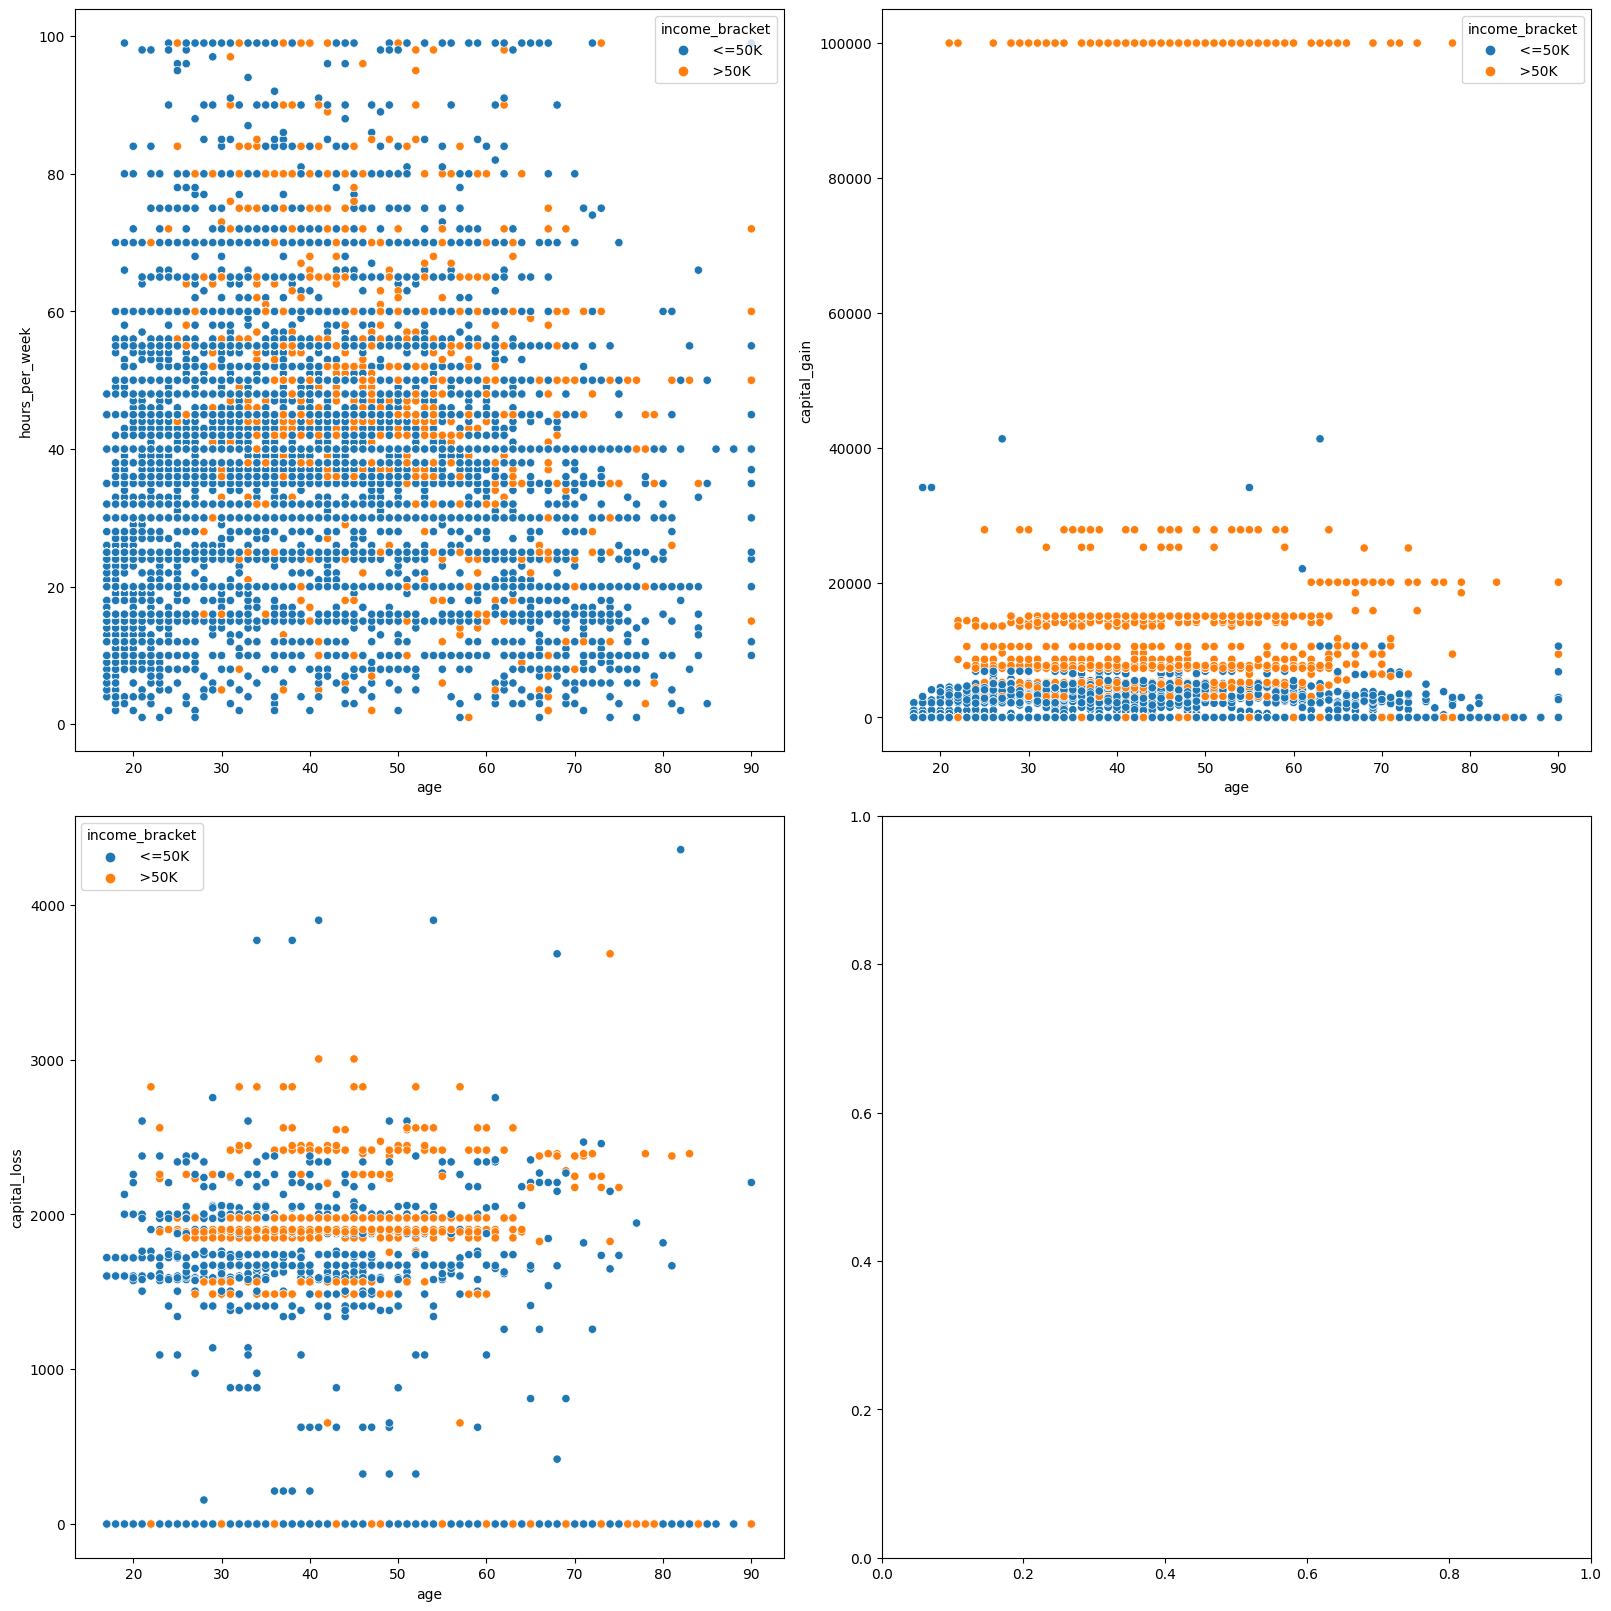

In [26]:
def isolate():
    fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(16,16))
    for xy, ax in zip([["age", "hours_per_week"],
                       ["age", "capital_gain"],
                       ["age", "capital_loss"]], axes.ravel()):
        sns.scatterplot(data=data, x=xy[0], y=xy[1], hue="income_bracket", ax=ax)

isolate()

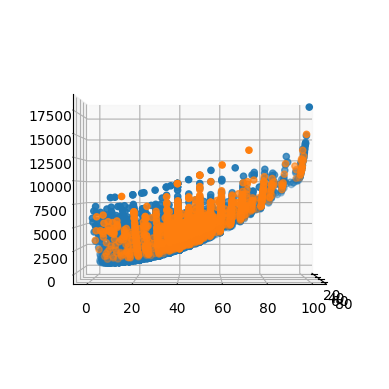

In [92]:
# trying to visualize feature 'age' and 'hours_per_week'.
# the computer is better.
def isolate():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(data.loc[data['income_bracket'] == ' <=50K','age'], 
               data.loc[data['income_bracket'] == ' <=50K', 'hours_per_week'], 
               data.loc[data['income_bracket'] == ' <=50K','age']**2 + 
                data.loc[data['income_bracket'] == ' <=50K','hours_per_week']**2, 
               marker='o')
    
    ax.scatter(data.loc[data['income_bracket'] == ' >50K','age'], 
               data.loc[data['income_bracket'] == ' >50K', 'hours_per_week'], 
               data.loc[data['income_bracket'] == ' >50K','age']**2 + 
                data.loc[data['income_bracket'] == ' >50K','hours_per_week']**2, 
               marker='o')
    
    ax.view_init(0, 0)

isolate()

## 4.3 - X Categorical to y Categorical Relationship

### 4.3.1 - bar plot

We can't see pattern in columns 'workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'.
- Although there is noticeable income_bracket distribution between label. Everyone's income_bracket, most of the time is ' <=50K'

We can see pattern in column 'education'. The higher education (after Bachelors), the more likely you to be in the income_bracket ' >50K'

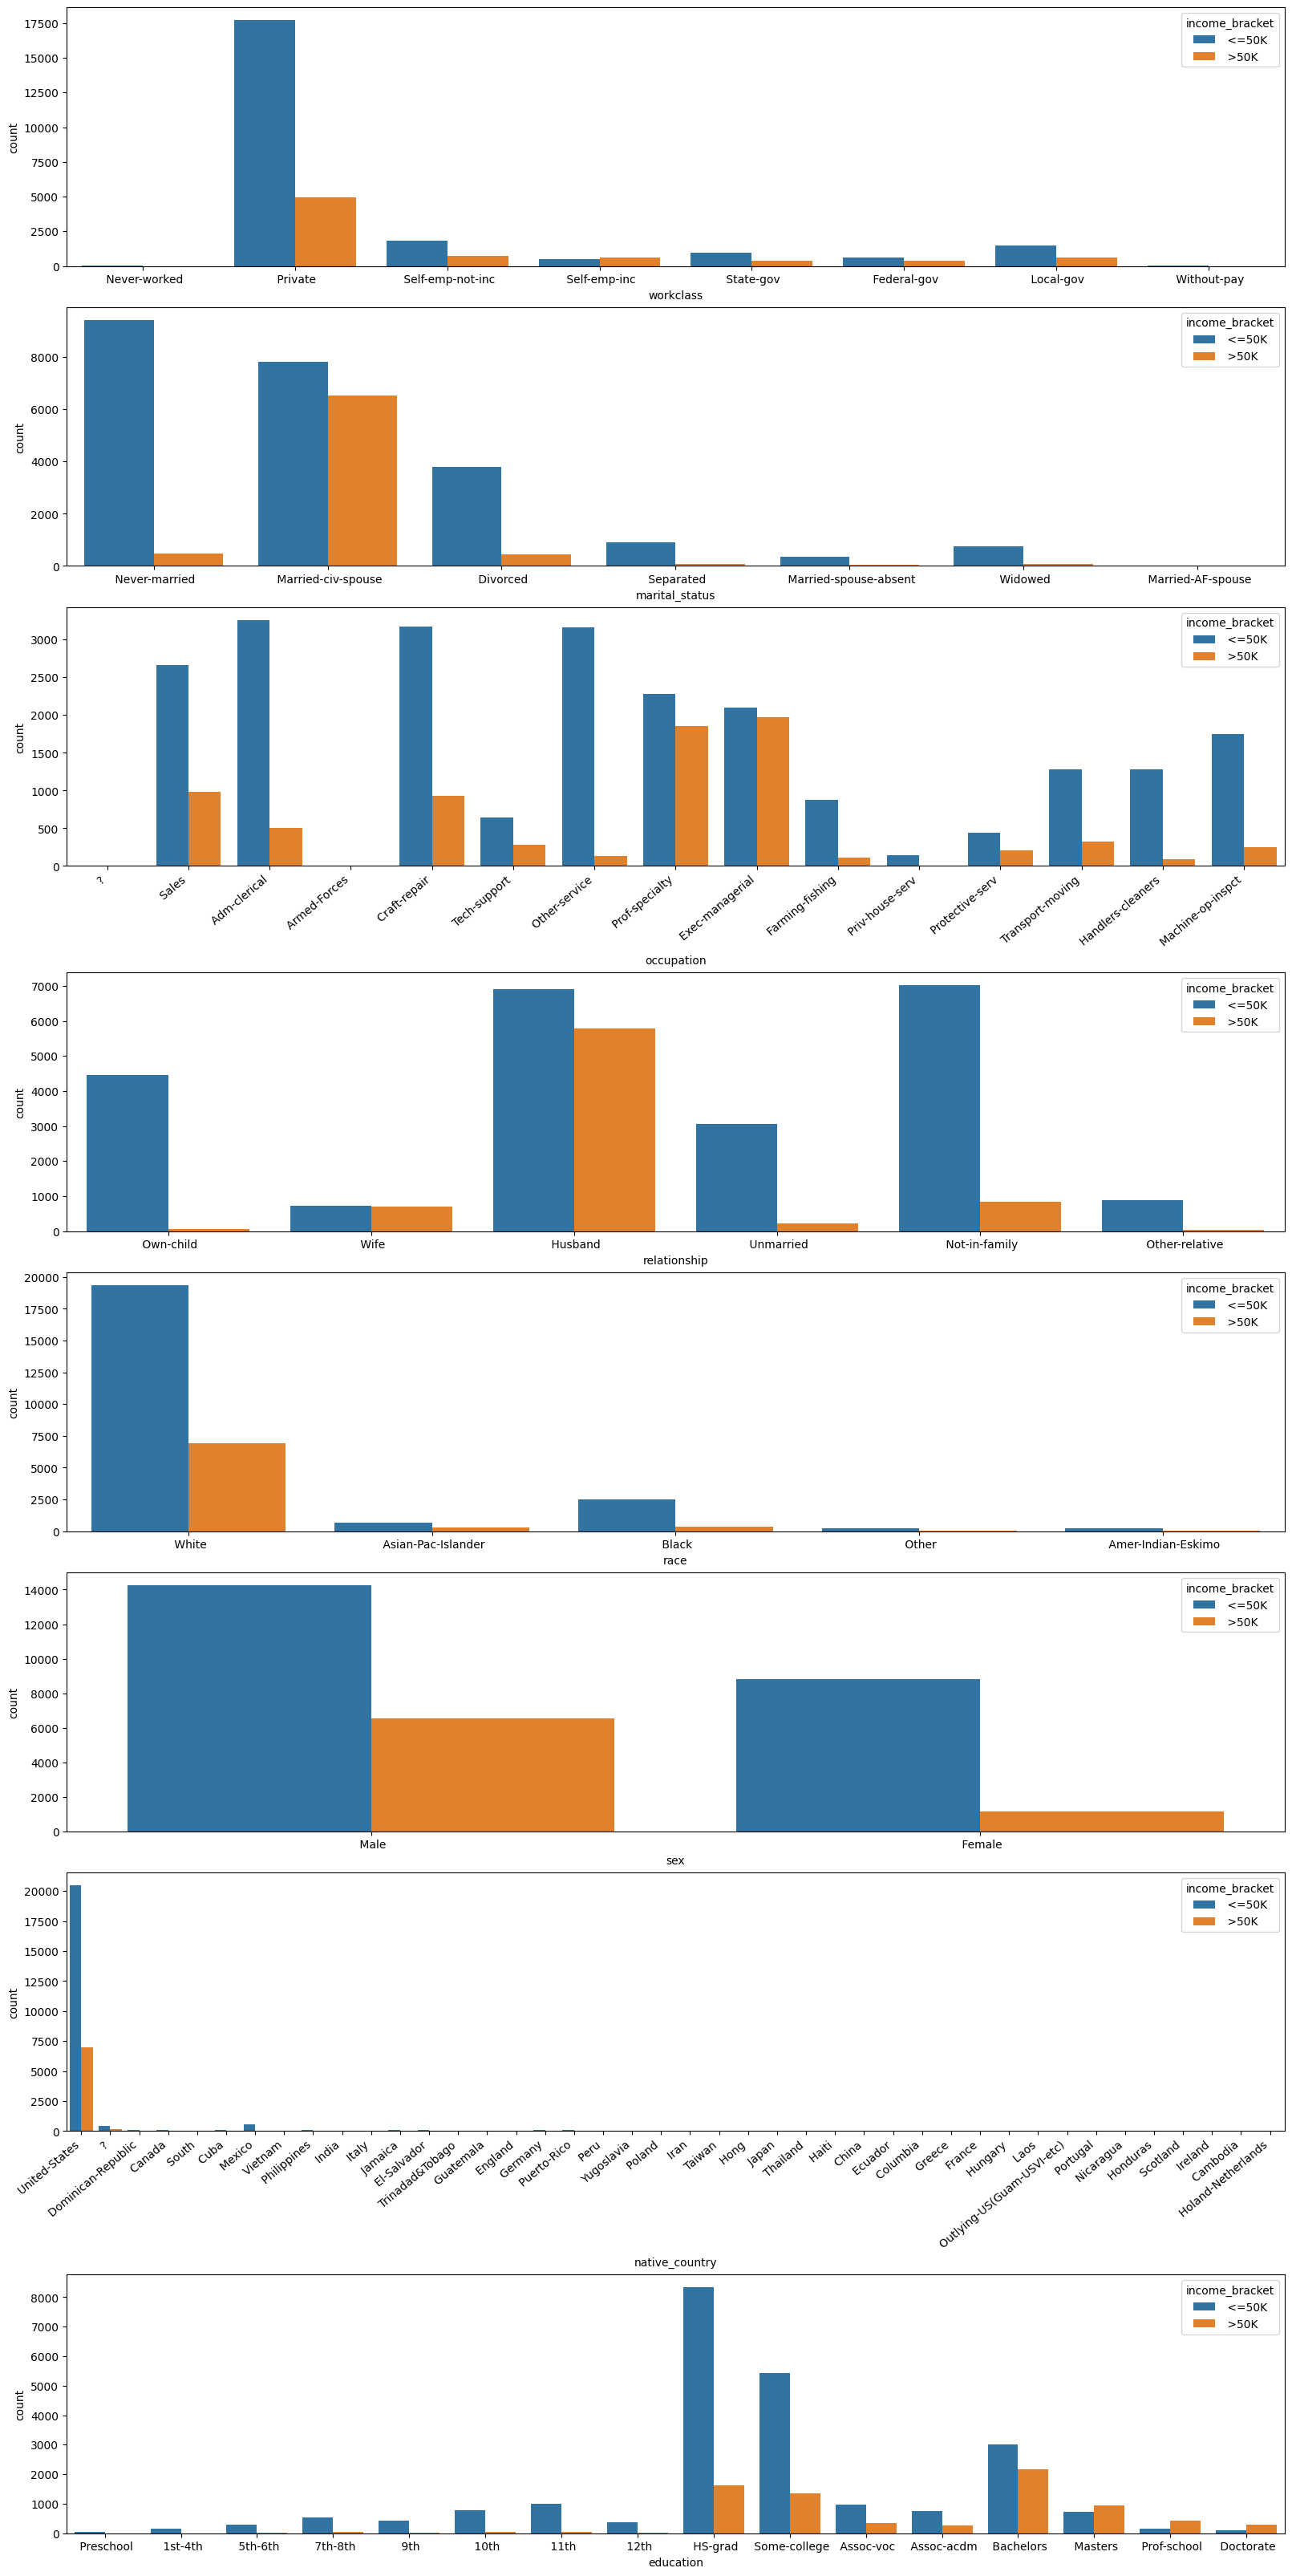

In [28]:
# no noticeable column values that can differentiate 
# if a person is definitely in the income_bracket ' >50K'
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(16,32), constrained_layout=True)
for index, column in enumerate(['workclass', 'marital_status', 'occupation', 
                                'relationship', 'race', 'sex', 'native_country', 
                                'education']):
    sns.countplot(data=data, x=column, hue="income_bracket", ax=axes[index])
    if column in ['occupation', 'native_country']:
        axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=40, ha="right")

del fig, axes, index, column

### 4.3.2 - cross tab

column 'workclass', 'occupation', 'native_country', 'education' have values that only exists in a specific income_bracket. 

However, the frequency is too small compared to the population.

In [29]:
# column: 'workclass'
# ' Never-worked', ' Without-pay' is definitely in income_brakcet ' <=50K'
# however the frequency is too small.

# column: 'occupation'
# ' ?' is definitely in income_bracket ' <50K'
# however the frequency is too small.

# column: 'native_country'
# ' Holand-Netherlands', ' Outlying-US(Guam-USVI-etc)' is definitely in income_bracket ' <50K'
# however the frequency is too small.

# column: 'education'
# ' Preschool' is definitely in income_bracket ' <50K'
# however the frequency is too small.
for column in ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 
               'education']:
    display(pd.crosstab(data[column], data['income_bracket']))

del column

income_bracket,<=50K,>50K
workclass,,
Federal-gov,589,371
Local-gov,1476,617
Never-worked,7,0
Private,17733,4963
Self-emp-inc,494,622
Self-emp-not-inc,1817,724
State-gov,945,353
Without-pay,14,0


income_bracket,<=50K,>50K
marital_status,,
Divorced,3802,457
Married-AF-spouse,11,10
Married-civ-spouse,7819,6521
Married-spouse-absent,356,33
Never-married,9435,482
Separated,893,66
Widowed,759,81


income_bracket,<=50K,>50K
occupation,,
?,7,0
Adm-clerical,3263,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other-service,3158,137


income_bracket,<=50K,>50K
relationship,,
Husband,6915,5789
Not-in-family,7028,838
Other-relative,882,36
Own-child,4464,66
Unmarried,3055,216
Wife,731,705


income_bracket,<=50K,>50K
race,,
Amer-Indian-Eskimo,252,34
Asian-Pac-Islander,703,271
Black,2533,378
Other,225,23
White,19362,6944


income_bracket,<=50K,>50K
sex,,
Female,8805,1127
Male,14270,6523


income_bracket,<=50K,>50K
native_country,,
?,414,142
Cambodia,11,7
Canada,71,36
China,48,20
Columbia,54,2
Cuba,67,25
Dominican-Republic,65,2
Ecuador,23,4
El-Salvador,91,9


income_bracket,<=50K,>50K
education,,
Preschool,46,0
1st-4th,150,6
5th-6th,289,14
7th-8th,536,38
9th,437,26
10th,773,60
11th,997,60
12th,362,31
HS-grad,8340,1629


# 5 - Data Preprocessing
  > Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 5.1 - Inference Set

In [30]:
# sample 5 data for each income_bracket.
data_inf = data.groupby('income_bracket') \
                .sample(5, random_state=0)

In [31]:
# drop inference set from train and test set
# inference set is to simulate user using the model
data_train_test = data.drop(data_inf.index, axis='index')

## 5.2 - Train Set and Test Set

no need to handle natura outliers nor missing values

In [32]:
# drop 'education_num' because it have correlation 1 with education
# drop 'income_bracket' from X variable because it is the target
# assign 'income_bracket' to y variable.
X = data_train_test.drop(['income_bracket'], axis='columns')
y = data_train_test['income_bracket']

In [33]:
# separate dataset to train set and test set
# test set is to test whether the model is good against never seen data

# stratify=y to make sure the split between train set and test set
# each have equal propotion as the original y.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y)
y_train.value_counts()

 <=50K    18456
 >50K      6116
Name: income_bracket, dtype: int64

In [34]:
# over sampling to make the train set balanced
ros = RandomOverSampler(sampling_strategy=1, random_state=0)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
y_train_res.value_counts()

 <=50K    18456
 >50K     18456
Name: income_bracket, dtype: int64

## 5.3 - Feature Selection with Personal Judgement

drop column 'education_num' because it is duplicate with column 'education'

In [35]:
# drop 'education_num' because it is duplicate with column 'education'
X_train_res.drop(labels=['education_num'], axis='columns', inplace=True)
X_test.drop(labels=['education_num'], axis='columns', inplace=True)

In [36]:
# split columns to numerical and categorical
numerical_features = X_train_res.select_dtypes(include='number').columns.tolist()
ordinal_features = X_train_res.select_dtypes(include='category').columns.tolist()
nominal_features = X_train_res.select_dtypes(include='object').columns.tolist()

## 5.4 - Pipeline

we will use median instead of mean because we dont handle natural outliers.

anyway, there is no missing values in the dataset.

In [37]:
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', MinMaxScaler())
    ]
)

ordinal_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OrdinalEncoder(categories=[X_train_res['education'].cat.categories])),
        ('scaler', MinMaxScaler())
    ]
)

nominal_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy="most_frequent")),
           ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

# feature engineering based on the data type
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_features),
        ("ordinal", ordinal_transformer, ordinal_features),
        ("nominal", nominal_transformer, nominal_features)
    ]
)

## 5.5 - Feature Selection (based on Mixed Types)

[reference](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

in the future, this section will be used to drop columns that are: [outline](#53---feature-selection-with-personal-judgement)
1. personal judgement that the column no correlation with the target e.g 'id', 'name'.
2. personal judgement that 2 or more features have multicollinearity e.g 'education' and 'education_num'

the actual feature selection will be done automatically by the model.

### 5.3.1 - X Numerical, y Categorical with sklearn.feature_selection.fclassif

insights:
1. f_classif performance is better if we include ordinal and nominal features.

In [38]:
def isolate():
    X_train_res_numerical_scaled = numerical_transformer \
                                   .fit_transform(X_train_res[numerical_features])

    f_statistic, p_values = f_classif(X=X_train_res_numerical_scaled, y=y_train_res)
    
    features = np.concatenate([numerical_transformer.get_feature_names_out()],
                              axis=0)
    df = pd.DataFrame({'features': features,
                       'f_statistic': f_statistic,
                       'p_values': p_values,
                       'reject H0': p_values <= 0.05})
    display(df[(df['reject H0'] == True) & (df['f_statistic'] > 1000)]
            .sort_values(by='f_statistic', ascending=False)
            .reset_index(drop=True))

isolate()

,features,f_statistic,p_values,reject H0
0,age,3434.087323,0.000000e+00,True
1,hours_per_week,2941.571998,0.000000e+00,True
2,capital_gain,1256.909473,9.312718e-271,True


In [39]:
# excluding ordinal and nominal features
def isolate():
    X_train_res_numerical_scaled = numerical_transformer \
                                   .fit_transform(X_train_res[numerical_features])
    X_test_numerical_scaled = numerical_transformer.transform(X_test[numerical_features])
    
    # X_train_res_ordinal_encoded = ordinal_transformer \
    #                               .fit_transform(X_train_res[ordinal_features])
    # X_test_ordinal_encoded = ordinal_transformer.transform(X_test[ordinal_features])

    # X_train_res_nominal_encoded = nominal_transformer \
    #                               .fit_transform(X_train_res[nominal_features]).toarray()
    # X_test_nominal_encoded = nominal_transformer \
    #                          .transform(X_test[nominal_features]).toarray()

    X_train_res_final = np.concatenate([X_train_res_numerical_scaled,
                                        # X_train_res_ordinal_encoded, 
                                        # X_train_res_nominal_encoded
                                       ], axis=1)
    X_test_final = np.concatenate([X_test_numerical_scaled,
                                   # X_test_ordinal_encoded, 
                                   # X_test_nominal_encoded
                                  ], axis=1)

    selector = SelectKBest(score_func=f_classif, k=3)
    selector.fit(X_train_res_final, y_train_res)
    X_train_res_final_selected = selector.transform(X=X_train_res_final)
    X_tes_final_selected = selector.transform(X=X_test_final)

    log_reg = LogisticRegression(solver='lbfgs')
    log_reg.fit(X_train_res_final_selected,
                y_train_res)

    y_train_res_pred = log_reg.predict(X_train_res_final_selected)
    y_test_pred = log_reg.predict(X_tes_final_selected)
    print("accuracy score train set", 
          accuracy_score(y_true=y_train_res, y_pred=y_train_res_pred))
    print("accuracy score test set", 
          accuracy_score(y_true=y_test, y_pred=y_test_pred))
    print("classification report train set\n", 
          classification_report(y_true=y_train_res, 
                                y_pred=y_train_res_pred, zero_division=0))
    print("classification report train set\n", 
          classification_report(y_true=y_test, y_pred=y_test_pred, zero_division=0))

isolate()

accuracy score train set 0.6839781100996966
accuracy score test set 0.6999837213088068
classification report train set
               precision    recall  f1-score   support

       <=50K       0.67      0.71      0.69     18456
        >50K       0.69      0.66      0.67     18456

    accuracy                           0.68     36912
   macro avg       0.68      0.68      0.68     36912
weighted avg       0.68      0.68      0.68     36912

classification report train set
               precision    recall  f1-score   support

       <=50K       0.87      0.70      0.78      4614
        >50K       0.43      0.69      0.53      1529

    accuracy                           0.70      6143
   macro avg       0.65      0.70      0.66      6143
weighted avg       0.76      0.70      0.72      6143



In [40]:
def isolate():
    X_train_res_numerical_scaled = numerical_transformer \
                                   .fit_transform(X_train_res[numerical_features])
    X_test_numerical_scaled = numerical_transformer.transform(X_test[numerical_features])
    
    X_train_res_ordinal_encoded = ordinal_transformer \
                                  .fit_transform(X_train_res[ordinal_features])
    X_test_ordinal_encoded = ordinal_transformer.transform(X_test[ordinal_features])

    X_train_res_nominal_encoded = nominal_transformer \
                                  .fit_transform(X_train_res[nominal_features]).toarray()
    X_test_nominal_encoded = nominal_transformer \
                             .transform(X_test[nominal_features]).toarray()

    X_train_res_final = np.concatenate([X_train_res_numerical_scaled,
                                        X_train_res_ordinal_encoded, 
                                        X_train_res_nominal_encoded
                                       ], axis=1)
    X_test_final = np.concatenate([X_test_numerical_scaled,
                                   X_test_ordinal_encoded, 
                                   X_test_nominal_encoded
                                  ], axis=1)

    selector = SelectKBest(score_func=f_classif, k=3)
    selector.fit(X_train_res_final, y_train_res)
    X_train_res_final_selected = selector.transform(X=X_train_res_final)
    X_tes_final_selected = selector.transform(X=X_test_final)

    log_reg = LogisticRegression(solver='lbfgs')
    log_reg.fit(X_train_res_final_selected,
                y_train_res)

    y_train_res_pred = log_reg.predict(X_train_res_final_selected)
    y_test_pred = log_reg.predict(X_tes_final_selected)
    print("accuracy score train set", 
          accuracy_score(y_true=y_train_res, y_pred=y_train_res_pred))
    print("accuracy score test set", 
          accuracy_score(y_true=y_test, y_pred=y_test_pred))
    print("classification report train set\n", 
          classification_report(y_true=y_train_res, 
                                y_pred=y_train_res_pred, zero_division=0))
    print("classification report train set\n", 
          classification_report(y_true=y_test, y_pred=y_test_pred, zero_division=0))

isolate()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


accuracy score train set 0.7808842652795839
accuracy score test set 0.7467035650333713
classification report train set
               precision    recall  f1-score   support

       <=50K       0.83      0.71      0.76     18456
        >50K       0.74      0.86      0.80     18456

    accuracy                           0.78     36912
   macro avg       0.79      0.78      0.78     36912
weighted avg       0.79      0.78      0.78     36912

classification report train set
               precision    recall  f1-score   support

       <=50K       0.93      0.71      0.81      4614
        >50K       0.49      0.85      0.62      1529

    accuracy                           0.75      6143
   macro avg       0.71      0.78      0.72      6143
weighted avg       0.82      0.75      0.76      6143



### 5.3.2 - X Categorical, y Categorical with sklearn.feature_selection.mutual_info_classif

insights:
1. mutual_info_classif performance is better if we include numerical features.

In [41]:
def isolate():
    X_train_res_ordinal_encoded = ordinal_transformer \
                                  .fit_transform(X_train_res[ordinal_features])    
    X_train_res_nominal_encoded = nominal_transformer \
                                  .fit_transform(X_train_res[nominal_features]).toarray()

    X_train_res_final = np.concatenate([X_train_res_ordinal_encoded, 
                                        X_train_res_nominal_encoded], 
                                       axis=1)

    mi = mutual_info_classif(X=X_train_res_final, y=y_train_res)
    
    features = np.concatenate([ordinal_transformer.get_feature_names_out(),
                               nominal_transformer.get_feature_names_out()],
                              axis=0)
    df = pd.DataFrame({'features': features,
                       'mutual information': mi})
    display(df[df['mutual information'] > 0.01]
            .sort_values(by='mutual information', ascending=False)
            .reset_index(drop=True))

isolate()

,features,mutual information
0,marital_status_ Married-civ-spouse,0.148775
1,marital_status_ Never-married,0.090836
2,education,0.088169
3,relationship_ Own-child,0.058197
4,relationship_ Not-in-family,0.035384
5,sex_ Male,0.033149
6,occupation_ Other-service,0.032218
7,occupation_ Exec-managerial,0.025023
8,relationship_ Unmarried,0.022955
9,occupation_ Prof-specialty,0.014460


In [42]:
# excluding numerical features
def isolate():
    # X_train_res_numerical_scaled = numeric_transformer \
    #                                .fit_transform(X_train_res[numerical_features])
    # X_test_numerical_scaled = numeric_transformer.transform(X_test[numerical_features])
    
    X_train_res_ordinal_encoded = ordinal_transformer \
                                  .fit_transform(X_train_res[ordinal_features])
    X_test_ordinal_encoded = ordinal_transformer.transform(X_test[ordinal_features])

    X_train_res_nominal_encoded = nominal_transformer \
                                  .fit_transform(X_train_res[nominal_features]).toarray()
    X_test_nominal_encoded = nominal_transformer \
                             .transform(X_test[nominal_features]).toarray()

    X_train_res_final = np.concatenate([# X_train_res_numerical_scaled,
                                        X_train_res_ordinal_encoded, 
                                        X_train_res_nominal_encoded
                                       ], axis=1)
    X_test_final = np.concatenate([# X_test_numerical_scaled,
                                   X_test_ordinal_encoded, 
                                   X_test_nominal_encoded
                                  ], axis=1)

    selector = SelectKBest(score_func=mutual_info_classif, k=12)
    selector.fit(X_train_res_final, y_train_res)
    X_train_res_final_selected = selector.transform(X=X_train_res_final)
    X_tes_final_selected = selector.transform(X=X_test_final)

    log_reg = LogisticRegression(solver='lbfgs')
    log_reg.fit(X_train_res_final_selected,
                y_train_res)

    y_train_res_pred = log_reg.predict(X_train_res_final_selected)
    y_test_pred = log_reg.predict(X_tes_final_selected)
    print("accuracy score train set", 
          accuracy_score(y_true=y_train_res, y_pred=y_train_res_pred))
    print("accuracy score test set", 
          accuracy_score(y_true=y_test, y_pred=y_test_pred))
    print("classification report train set\n", 
          classification_report(y_true=y_train_res, 
                                y_pred=y_train_res_pred, zero_division=0))
    print("classification report train set\n", 
          classification_report(y_true=y_test, y_pred=y_test_pred, zero_division=0))

isolate()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


accuracy score train set 0.7870882097962723
accuracy score test set 0.7582614357805633
classification report train set
               precision    recall  f1-score   support

       <=50K       0.82      0.73      0.77     18456
        >50K       0.76      0.84      0.80     18456

    accuracy                           0.79     36912
   macro avg       0.79      0.79      0.79     36912
weighted avg       0.79      0.79      0.79     36912

classification report train set
               precision    recall  f1-score   support

       <=50K       0.93      0.73      0.82      4614
        >50K       0.51      0.84      0.63      1529

    accuracy                           0.76      6143
   macro avg       0.72      0.79      0.73      6143
weighted avg       0.83      0.76      0.77      6143



In [43]:
def isolate():
    X_train_res_numerical_scaled = numerical_transformer \
                                   .fit_transform(X_train_res[numerical_features])
    X_test_numerical_scaled = numerical_transformer.transform(X_test[numerical_features])
    
    X_train_res_ordinal_encoded = ordinal_transformer \
                                  .fit_transform(X_train_res[ordinal_features])
    X_test_ordinal_encoded = ordinal_transformer.transform(X_test[ordinal_features])

    X_train_res_nominal_encoded = nominal_transformer \
                                  .fit_transform(X_train_res[nominal_features]).toarray()
    X_test_nominal_encoded = nominal_transformer \
                             .transform(X_test[nominal_features]).toarray()

    X_train_res_final = np.concatenate([X_train_res_numerical_scaled,
                                        X_train_res_ordinal_encoded, 
                                        X_train_res_nominal_encoded
                                       ], axis=1)
    X_test_final = np.concatenate([X_test_numerical_scaled,
                                   X_test_ordinal_encoded, 
                                   X_test_nominal_encoded
                                  ], axis=1)

    selector = SelectKBest(score_func=mutual_info_classif, k=12)
    selector.fit(X_train_res_final, y_train_res)
    X_train_res_final_selected = selector.transform(X=X_train_res_final)
    X_tes_final_selected = selector.transform(X=X_test_final)

    log_reg = LogisticRegression(solver='lbfgs')
    log_reg.fit(X_train_res_final_selected,
                y_train_res)

    y_train_res_pred = log_reg.predict(X_train_res_final_selected)
    y_test_pred = log_reg.predict(X_tes_final_selected)
    print("accuracy score train set", 
          accuracy_score(y_true=y_train_res, y_pred=y_train_res_pred))
    print("accuracy score test set", 
          accuracy_score(y_true=y_test, y_pred=y_test_pred))
    print("classification report train set\n", 
          classification_report(y_true=y_train_res, 
                                y_pred=y_train_res_pred, zero_division=0))
    print("classification report train set\n", 
          classification_report(y_true=y_test, y_pred=y_test_pred, zero_division=0))

isolate()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


accuracy score train set 0.8135294755093194
accuracy score test set 0.8009116067068208
classification report train set
               precision    recall  f1-score   support

       <=50K       0.84      0.78      0.81     18456
        >50K       0.79      0.85      0.82     18456

    accuracy                           0.81     36912
   macro avg       0.82      0.81      0.81     36912
weighted avg       0.82      0.81      0.81     36912

classification report train set
               precision    recall  f1-score   support

       <=50K       0.94      0.78      0.86      4614
        >50K       0.57      0.86      0.68      1529

    accuracy                           0.80      6143
   macro avg       0.75      0.82      0.77      6143
weighted avg       0.85      0.80      0.81      6143



### 5.3.3 - X Categorical and y Categorical with sklearn.feature_selection.chi2

insight:
1. chi2 performance is better if we include numerical features.

In [44]:
def isolate():
    X_train_res_ordinal_encoded = ordinal_transformer \
                                  .fit_transform(X_train_res[ordinal_features])    
    X_train_res_nominal_encoded = nominal_transformer \
                                  .fit_transform(X_train_res[nominal_features]).toarray()

    X_train_res_final = np.concatenate([X_train_res_ordinal_encoded, 
                                        X_train_res_nominal_encoded], axis=1)

    chi_squared, pvalues = chi2(X=X_train_res_final, y=y_train_res)
    
    features = np.concatenate([ordinal_transformer.get_feature_names_out(),
                               nominal_transformer.get_feature_names_out()],
                              axis=0)

    df = pd.DataFrame({'features': features,
                       'chi2': chi_squared,
                       'pvalues': pvalues,
                       'reject H0': pvalues < 0.05})

    display(df[(df['reject H0'] == True) & (df['chi2'] > 100)]
            .sort_values(by='chi2', ascending=False)
            .reset_index(drop=True))

isolate()

,features,chi2,pvalues,reject H0
0,marital_status_ Never-married,4717.395519,0.000000e+00,True
1,marital_status_ Married-civ-spouse,4127.722668,0.000000e+00,True
2,relationship_ Own-child,3083.320256,0.000000e+00,True
3,relationship_ Not-in-family,1769.094724,0.000000e+00,True
4,occupation_ Other-service,1706.076708,0.000000e+00,True
5,occupation_ Exec-managerial,1489.827068,0.000000e+00,True
6,relationship_ Unmarried,1244.528895,1.282548e-272,True
7,occupation_ Prof-specialty,1121.165829,8.291864e-246,True
8,sex_ Male,694.989486,3.675182e-153,True
9,workclass_ Self-emp-inc,693.651020,7.183572e-153,True


In [45]:
# excluding numerical features
def isolate():
    # X_train_res_numerical_scaled = numerical_transformer \
    #                                .fit_transform(X_train_res[numerical_features])
    # X_test_numerical_scaled = numerical_transformer.transform(X_test[numerical_features])

    X_train_res_ordinal_encoded = ordinal_transformer \
                                  .fit_transform(X_train_res[ordinal_features])
    X_test_ordinal_encoded = ordinal_transformer.transform(X_test[ordinal_features])

    X_train_res_nominal_encoded = nominal_transformer \
                                  .fit_transform(X_train_res[nominal_features]).toarray()
    X_test_nominal_encoded = nominal_transformer \
                             .transform(X_test[nominal_features]).toarray()

    X_train_res_final = np.concatenate([# X_train_res_numerical_scaled,
                                        X_train_res_ordinal_encoded, 
                                        X_train_res_nominal_encoded
                                       ], axis=1)
    X_test_final = np.concatenate([# X_test_numerical_scaled,
                                   X_test_ordinal_encoded, 
                                   X_test_nominal_encoded
                                  ], axis=1)

    selector = SelectKBest(score_func=chi2, k=23)
    selector.fit(X_train_res_final, y_train_res)
    X_train_res_final_selected = selector.transform(X=X_train_res_final)
    X_tes_final_selected = selector.transform(X=X_test_final)

    log_reg = LogisticRegression(solver='lbfgs', max_iter=300)
    log_reg.fit(X_train_res_final_selected,
                y_train_res)

    y_train_res_pred = log_reg.predict(X_train_res_final_selected)
    y_test_pred = log_reg.predict(X_tes_final_selected)
    print("accuracy score train set", 
          accuracy_score(y_true=y_train_res, y_pred=y_train_res_pred))
    print("accuracy score test set", 
          accuracy_score(y_true=y_test, y_pred=y_test_pred))
    print("classification report train set\n", 
          classification_report(y_true=y_train_res, 
                                y_pred=y_train_res_pred, zero_division=0))
    print("classification report train set\n", 
          classification_report(y_true=y_test, y_pred=y_test_pred, zero_division=0))

isolate()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


accuracy score train set 0.792018855656697
accuracy score test set 0.7706332410874166
classification report train set
               precision    recall  f1-score   support

       <=50K       0.82      0.75      0.78     18456
        >50K       0.77      0.83      0.80     18456

    accuracy                           0.79     36912
   macro avg       0.79      0.79      0.79     36912
weighted avg       0.79      0.79      0.79     36912

classification report train set
               precision    recall  f1-score   support

       <=50K       0.93      0.75      0.83      4614
        >50K       0.52      0.84      0.64      1529

    accuracy                           0.77      6143
   macro avg       0.73      0.79      0.74      6143
weighted avg       0.83      0.77      0.78      6143



In [46]:
def isolate():
    X_train_res_numerical_scaled = numerical_transformer \
                                   .fit_transform(X_train_res[numerical_features])
    X_test_numerical_scaled = numerical_transformer.transform(X_test[numerical_features])

    X_train_res_ordinal_encoded = ordinal_transformer \
                                  .fit_transform(X_train_res[ordinal_features])
    X_test_ordinal_encoded = ordinal_transformer.transform(X_test[ordinal_features])

    X_train_res_nominal_encoded = nominal_transformer \
                                  .fit_transform(X_train_res[nominal_features]).toarray()
    X_test_nominal_encoded = nominal_transformer \
                             .transform(X_test[nominal_features]).toarray()

    X_train_res_final = np.concatenate([X_train_res_numerical_scaled,
                                        X_train_res_ordinal_encoded, 
                                        X_train_res_nominal_encoded
                                       ], axis=1)
    X_test_final = np.concatenate([X_test_numerical_scaled,
                                   X_test_ordinal_encoded, 
                                   X_test_nominal_encoded
                                  ], axis=1)

    selector = SelectKBest(score_func=chi2, k=23)
    selector.fit(X_train_res_final, y_train_res)
    X_train_res_final_selected = selector.transform(X=X_train_res_final)
    X_tes_final_selected = selector.transform(X=X_test_final)

    log_reg = LogisticRegression(solver='lbfgs', max_iter=300)
    log_reg.fit(X_train_res_final_selected,
                y_train_res)

    y_train_res_pred = log_reg.predict(X_train_res_final_selected)
    y_test_pred = log_reg.predict(X_tes_final_selected)
    print("accuracy score train set", 
          accuracy_score(y_true=y_train_res, y_pred=y_train_res_pred))
    print("accuracy score test set", 
          accuracy_score(y_true=y_test, y_pred=y_test_pred))
    print("classification report train set\n", 
          classification_report(y_true=y_train_res, 
                                y_pred=y_train_res_pred, zero_division=0))
    print("classification report train set\n", 
          classification_report(y_true=y_test, y_pred=y_test_pred, zero_division=0))

isolate()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


accuracy score train set 0.811443433029909
accuracy score test set 0.7950512778772587
classification report train set
               precision    recall  f1-score   support

       <=50K       0.84      0.77      0.80     18456
        >50K       0.79      0.85      0.82     18456

    accuracy                           0.81     36912
   macro avg       0.81      0.81      0.81     36912
weighted avg       0.81      0.81      0.81     36912

classification report train set
               precision    recall  f1-score   support

       <=50K       0.94      0.77      0.85      4614
        >50K       0.56      0.86      0.68      1529

    accuracy                           0.80      6143
   macro avg       0.75      0.82      0.76      6143
weighted avg       0.85      0.80      0.81      6143



# 6 - Model Definition, Training, Evaluation, Inference

To make it easier to understand the difference between model. We will combine model definition, training, evaluation, inference into one section.

## 6.1 - Logistic Regression with All Features

### 6.1.1 - Model Definition
  > Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

The reason for using `sklearn.linear_model.LogisticRegression`:
1. This model can predict 2 or more class by changing the hyperparameter. This dataset has 2 classes.

The reason for using `sklearn.metrics.accuracy_score`:
1. It tells us the accuracy of the model regardless of the income_bracket.

The reason for using `sklearn.metrics.classification_report`:
1. It tells us the recall score for income_bracket ' >50K'. 
2. A model can have accuracy score of 0.9 in an imbalanced dataset (90% of the population are 'class 1', 10% are 'class 2') simply by classifying everything as 'class 1'.

In [47]:
# solver="sag" according the documentation is faster for larger dataset.
# Also, because there is no change in recall score regardless of solver. 
# So, we use solver="sag"
# random_state=42 to make the model reproduceable. 
# This is because solver="sag" shuffle the data.
lr_all = LogisticRegression(solver="sag", random_state=42, max_iter=700)

### 6.1.2 - Model Training
  > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [48]:
def isolate():
    # preprocess the features train set
    X_train_res_final = preprocessor.fit_transform(X_train_res)
    
    lr_all.fit(X_train_res_final, y_train_res)

isolate()

### 6.1.3 - Model Evaluation
   > Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

The model's recall score for income_bracket ` >50K' is 0.85 with the train set and test set. This indicates that the model can identify income_bracket ' >50K' with the test set / never seen data and not predicting every instance as income_bracket ' <=50K'.

In [49]:
def isolate():
      # preprocess the features train set
      X_train_res_final = preprocessor.fit_transform(X_train_res)
      X_test_final = preprocessor.transform(X_test)

      y_train_res_pred = lr_all.predict(X_train_res_final)
      y_test_pred = lr_all.predict(X_test_final)

      print("accuracy score train set", 
            accuracy_score(y_true=y_train_res, y_pred=y_train_res_pred))
      print("accuracy score test set", 
            accuracy_score(y_true=y_test, y_pred=y_test_pred))
      print("classification report train set\n", 
            classification_report(y_true=y_train_res, y_pred=y_train_res_pred))
      print("classification report test set\n", 
            classification_report(y_true=y_test, y_pred=y_test_pred))

isolate()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


accuracy score train set 0.8196250541829215
accuracy score test set 0.8116555428943513
classification report train set
               precision    recall  f1-score   support

       <=50K       0.84      0.79      0.81     18456
        >50K       0.80      0.85      0.82     18456

    accuracy                           0.82     36912
   macro avg       0.82      0.82      0.82     36912
weighted avg       0.82      0.82      0.82     36912

classification report test set
               precision    recall  f1-score   support

       <=50K       0.94      0.80      0.86      4614
        >50K       0.58      0.85      0.69      1529

    accuracy                           0.81      6143
   macro avg       0.76      0.83      0.78      6143
weighted avg       0.85      0.81      0.82      6143



### 6.1.4 - Model Saving

In [50]:
def isolate():
    # wb = write binary
    with open('model/lr_all/preprocessor.pkl', 'wb') as file_1:
        joblib.dump(preprocessor, file_1)
    
    with open('model/lr_all/model.pkl', 'wb') as file_2:
        joblib.dump(lr_all, file_2)

isolate()

### 6.1.5 - Model Inference
  > Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [51]:
def isolate():
    global preprocessor, lr_all

    # rb = ready binary
    with open('model/lr_all/preprocessor.pkl', 'rb') as file_1:
        preprocessor = joblib.load(file_1)
    
    with open('model/lr_all/model.pkl', 'rb') as file_2:
        lr_all = joblib.load(file_2)

isolate()

In [52]:
def isolate():
    X_inf_final = preprocessor.transform(data_inf)
    y_inf = data_inf['income_bracket']
    y_inf_pred = lr_all.predict(X_inf_final)

    print("accuracy score test set", 
        accuracy_score(y_true=y_inf, y_pred=y_inf_pred))
    print("classification report test set\n", 
        classification_report(y_true=y_inf, y_pred=y_inf_pred))

isolate()

accuracy score test set 0.8
classification report test set
               precision    recall  f1-score   support

       <=50K       0.80      0.80      0.80         5
        >50K       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



## 6.2 - Logistic Regression with sklearn.feature_selection.SelectFromModel

### 6.2.1 - Model Definition
  > Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

[The reason for using `sklearn.linear_model.LogisticRegression](#61---logistic-regression-with-all-features)

[The reason for using `sklearn.metrics.accuracy_score`](#61---logistic-regression-with-all-features)

[The reason for using `sklearn.metrics.classification_report`](#61---logistic-regression-with-all-features)

The reason for using `sklearn.feature_selection.SelectFromModel`:
1. It chooses features based on importance weight. In this case, the `coefficient` is the importance weight. The threshold used is `absolute mean`.

In [53]:
lr_sfm = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectFromModel(estimator=LogisticRegression(max_iter=700))),
        ('classification', LogisticRegression(max_iter=700))
    ]
)

### 6.2.2 - Model Training
  > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [54]:
lr_sfm.fit(X_train_res, y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[Index([' Pre...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native_country'])])),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(max_iter=700))),
                ('classification', LogisticRegression(max_iter=700))])

### 6.2.3 - Model Evaluation
   > Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

The model recall score for income bracket ` >50K` is 0.84 with the train set and 0.85 with the test set. We have double checked that the over sampling is done after the `train_test_split`. Therefore, there should be no data leakage. Also, the recall score from previous model is similar to the current model.

Knowning these facts, we believe that changing features or using all of the features will not change the recall score drastically.

In [55]:
def isolate():
      y_train_res_pred = lr_sfm.predict(X_train_res)
      y_test_pred = lr_sfm.predict(X_test)

      print("accuracy score train set", 
            accuracy_score(y_true=y_train_res, y_pred=y_train_res_pred))
      print("accuracy score test set", 
            accuracy_score(y_true=y_test, y_pred=y_test_pred))
      print("classification report train set\n", 
            classification_report(y_true=y_train_res, y_pred=y_train_res_pred))
      print("classification report test set\n", 
            classification_report(y_true=y_test, y_pred=y_test_pred))

isolate()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


accuracy score train set 0.8140983961855224
accuracy score test set 0.8049812795051278
classification report train set
               precision    recall  f1-score   support

       <=50K       0.83      0.79      0.81     18456
        >50K       0.80      0.84      0.82     18456

    accuracy                           0.81     36912
   macro avg       0.82      0.81      0.81     36912
weighted avg       0.82      0.81      0.81     36912

classification report test set
               precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86      4614
        >50K       0.57      0.85      0.68      1529

    accuracy                           0.80      6143
   macro avg       0.76      0.82      0.77      6143
weighted avg       0.85      0.80      0.82      6143



In [56]:
# selected feature
def isolate():
    df = pd.DataFrame({'features': lr_sfm.named_steps['preprocessor']
                                   .get_feature_names_out(),
                       'coefficient': lr_sfm.named_steps['feature_selection']
                                      .estimator_.coef_[0],
                       'selected': lr_sfm.named_steps['feature_selection']
                                   .get_support()
                     })
    # manual calculation of the threshold
    print("threshold (manual):", df['coefficient'].apply(abs).mean())
    # the actual threshold
    print("threshold (actual):", lr_sfm.named_steps['feature_selection'].threshold_)

    display(df[df['selected'] == True].sort_values(by='coefficient', ascending=False)
                                      .reset_index(drop=True))

isolate()

threshold (manual): 0.9617031963433894
threshold (actual): 0.9617031963433894


,features,coefficient,selected
0,numerical__capital_gain,19.040733,True
1,ordinal__education,4.061777,True
2,numerical__hours_per_week,3.305787,True
3,numerical__capital_loss,2.772292,True
4,nominal__marital_status_ Married-AF-spouse,2.293948,True
5,nominal__marital_status_ Married-civ-spouse,2.091363,True
6,numerical__age,2.034032,True
7,nominal__relationship_ Wife,1.550811,True
8,nominal__native_country_ Yugoslavia,1.405795,True
9,nominal__native_country_ Cambodia,1.268442,True


### 6.2.4 - Model Saving

In [57]:
def isolate():
    # wb = write binary
    with open('model/lr_sfm/pipeline.pkl', 'wb') as file_1:
        joblib.dump(lr_sfm, file_1)

isolate()

### 6.2.5 - Model Inference
  > Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [58]:
def isolate():
    global lr_sfm
    
    # rb = read binary
    with open('model/lr_sfm/pipeline.pkl', 'rb') as file_1:
        lr_sfm = joblib.load(file_1)

isolate()


In [59]:
def isolate():
    y_inf = data_inf['income_bracket']
    y_inf_pred = lr_sfm.predict(data_inf)

    print("accuracy score test set", 
        accuracy_score(y_true=y_inf, y_pred=y_inf_pred))
    print("classification report test set\n", 
        classification_report(y_true=y_inf, y_pred=y_inf_pred))

isolate()

accuracy score test set 0.7
classification report test set
               precision    recall  f1-score   support

       <=50K       0.67      0.80      0.73         5
        >50K       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



## 6.3 - SVM with SelectFromModel

### 6.3.1 - Model Defintion
  > Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

The reason for using `sklearn.svm.LinearSVC` and not `sklearn.svm.SVC`:
1. `sklearn.svm.SVC` have scalability issues. [outline](#633---model-evaluation).
2. The features are definitely not linear. [outline](#425---linear-or-nonlinear).
   
   If we want to maximize the model recall score for income_bracket ' >50K'. For one, we need the 'age' feature. `sklearn.linear_model.LogisticRegression` can't do that. `sklearn.svm.LinearSVC` can do that by making it into a tensor `x, y, z`. x is feature 'age', y is feature 'hours_per_week' and z is `x^2 + y^2`.

In [60]:
svm_lr_sfm = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectFromModel(estimator=LogisticRegression(max_iter=700))),
        ('classification', LinearSVC())
    ]
)

### 6.3.2 - Model Training
  > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [61]:
svm_lr_sfm.fit(X_train_res, y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[Index([' Pre...
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native_country'])])),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(max_iter=700))),
                ('classification', LinearSVC())])

### 6.3.3 - Model Evaluation
   > Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

The model with `sklearn.svm.SVC` is noticeably slower than `sklearn.linear_model.LogisticRegression`. It requires 9.4s to predict 36,912 instances or 3,926 instances per second. That model have scalability issues. Therefore, we use `sklearn.svm.LinearSVC`.

The model recall score for income_bracket ' >50K' is 0.85 wih the train set and 0.87 with the test set. This is the best model we currently got to predict income_bracket ' >50K'. IRS can use this model to predict someone's income_bracket simply by giving inputs to this model.

- [ ] Find out the features importances.

  This is because real world usage may differ from the dataset we got. e.g what if the IRS do not have data of 'capital_gain' and 'capital_loss'

In [62]:
def isolate():
      y_train_res_pred = svm_lr_sfm.predict(X_train_res)
      y_test_pred = svm_lr_sfm.predict(X_test)

      print("accuracy score train set", 
            accuracy_score(y_true=y_train_res, y_pred=y_train_res_pred))
      print("accuracy score test set", 
            accuracy_score(y_true=y_test, y_pred=y_test_pred))
      print("classification report train set\n", 
            classification_report(y_true=y_train_res, y_pred=y_train_res_pred))
      print("classification report test set\n", 
            classification_report(y_true=y_test, y_pred=y_test_pred))

isolate()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


accuracy score train set 0.8151549631556133
accuracy score test set 0.8010743936187531
classification report train set
               precision    recall  f1-score   support

       <=50K       0.84      0.78      0.81     18456
        >50K       0.79      0.85      0.82     18456

    accuracy                           0.82     36912
   macro avg       0.82      0.82      0.81     36912
weighted avg       0.82      0.82      0.81     36912

classification report test set
               precision    recall  f1-score   support

       <=50K       0.95      0.78      0.85      4614
        >50K       0.57      0.87      0.68      1529

    accuracy                           0.80      6143
   macro avg       0.76      0.82      0.77      6143
weighted avg       0.85      0.80      0.81      6143



### 6.3.4 - Model Saving

In [63]:
def isolate():
    # wb = write binary
    with open('model/svm_lr_sfm/pipeline.pkl', 'wb') as file_1:
        joblib.dump(svm_lr_sfm, file_1)

isolate()

### 6.3.5 - Model Inference
  > Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [64]:
def isolate():
    global svm_lr_sfm
    
    # rb = read binary
    with open('model/svm_lr_sfm/pipeline.pkl', 'rb') as file_1:
        svm_lr_sfm = joblib.load(file_1)

In [65]:
def isolate():
    y_inf = data_inf['income_bracket']
    y_inf_pred = svm_lr_sfm.predict(data_inf)
    
    print("accuracy score test set", 
        accuracy_score(y_true=y_inf, y_pred=y_inf_pred))
    print("classification report test set\n", 
        classification_report(y_true=y_inf, y_pred=y_inf_pred))

isolate()

accuracy score test set 0.7
classification report test set
               precision    recall  f1-score   support

       <=50K       0.67      0.80      0.73         5
        >50K       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



# 7 - Pengambilan Kesimpulan
  > Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan _objective_ yang sudah ditulis di bagian pengenalan.

The [1st model (Logistic Regression with All Features)](#61---logistic-regression-with-all-features) can predict income_bracket ' >50K' with recall score of '0.85' (train set), '0.85' (test set) and '0.80' (inference set). This is the best model if the recall score is averaged.

The [2nd model (Logistic Regression with `sklearn.feature_selection.SelectFromModel`)](#62---logistic-regression-with-sklearnfeature_selectionselectfrommodel) can predict income bracket ' >50K' with recall score of '0.84' (train set), '0.85' (test set) and '0.60' (inference set). This indicates that `sklearn.model_selection.train_test_split` failed to split the train set and test set fairly, resulting in data leakage. Therefore, the model recall score for income_bracket ' >50K' is poor with never seen data set (although test set, in theory is also a never seen data set)

The [3rd model (SVM with `sklearn.feature_selection.SelectFromModel`)](#63---svm-with-selectfrommodel) can predict income bracket ' >50K' with recall score of '0.85' (train set), '0.87' (test set), and '0.60' (inference set). The model recall score for income_bracket ' >50K' is poor with never seen data set.

Therefore, we need to use `sklearn.model_selection.cross_val_score` to make sure that the high recall score for income_bracket ' >50K' is not due to data leakakge.